 # Name: Tufan Kundu
 # Reg no: 24MDT0184
 # EDA lab
 # 28 February

## Outlier detection On Boston house dataset

### Importing the necessary libraries

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

### Loading the dataset

In [13]:
df = pd.read_csv(r"D:\study material\VIT_Data_Science\Winter_Sem\Exploratory Data Analysis Lab\28_Feb\BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Selecting the lstat and medv  for the outlier detection

### Checking the distribution of both the variables

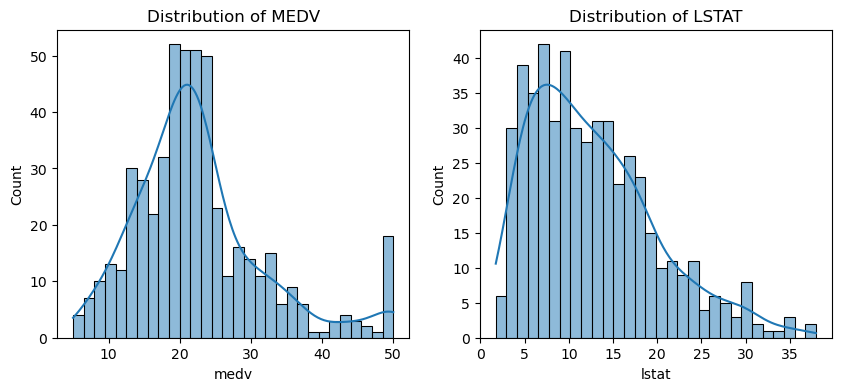

In [25]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df["medv"], bins=30, kde=True)
plt.title("Distribution of MEDV")

plt.subplot(1, 2, 2)
sns.histplot(df["lstat"], bins=30, kde=True)
plt.title("Distribution of LSTAT")

plt.show()


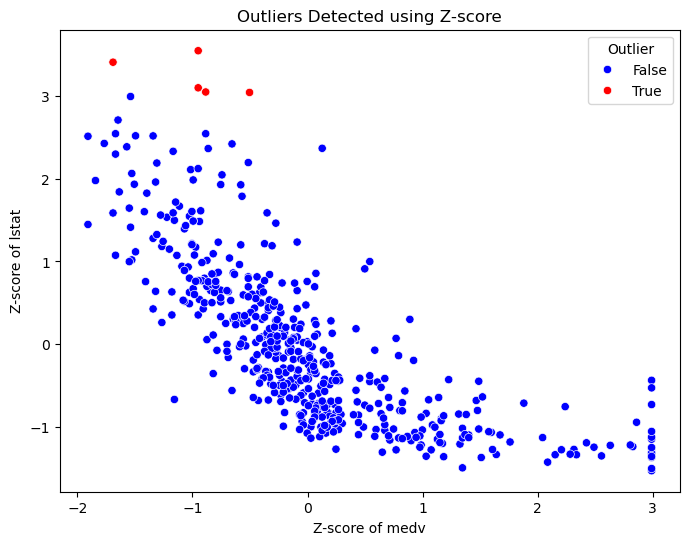

Z-score method detected outliers: 5


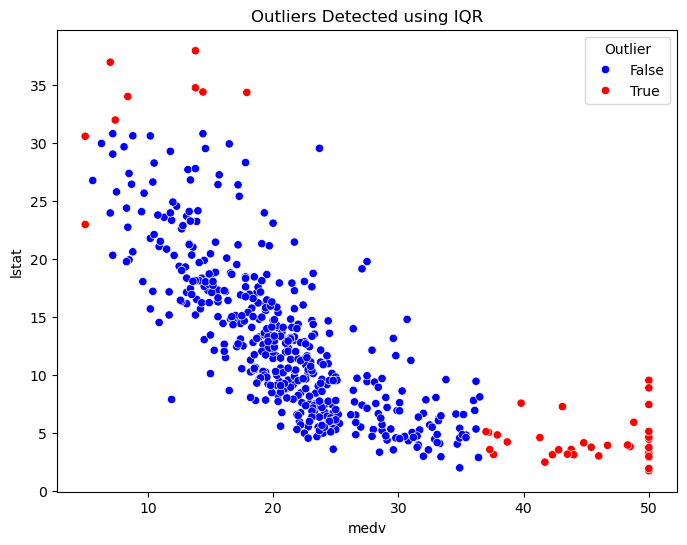

IQR method detected outliers: 47


In [23]:
feature1 = "medv"  
feature2 = "lstat"   

### Z-SCORE METHOD ###
df["Z_Feature1"] = zscore(df[feature1])
df["Z_Feature2"] = zscore(df[feature2])


df["Outlier_Z"] = (df["Z_Feature1"].abs() > 3) | (df["Z_Feature2"].abs() > 3)

# Plot Z-score method results
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Z_Feature1", y="Z_Feature2", data=df, hue="Outlier_Z", 
                palette={False: "blue", True: "red"})

plt.title("Outliers Detected using Z-score")
plt.xlabel(f"Z-score of {feature1}")
plt.ylabel(f"Z-score of {feature2}")
plt.legend(title="Outlier")
plt.show()

# Print the number of outliers detected using Z-score
print("Z-score method detected outliers:", df["Outlier_Z"].sum())


#--------------------------------------------------------------------------------------------------------------------------------------------

### IQR METHOD ###

# Compute Q1, Q3, and IQR for each feature
Q1 = df[[feature1, feature2]].quantile(0.25)
Q3 = df[[feature1, feature2]].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers: Flag points outside the IQR bounds in either feature
outlier_iqr = ((df[[feature1, feature2]] < lower_bound) | (df[[feature1, feature2]] > upper_bound)).any(axis=1)
df["Outlier_IQR"] = outlier_iqr

# Plot IQR method results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=feature1, y=feature2, data=df, hue="Outlier_IQR",
                palette={False: "blue", True: "red"})

plt.title("Outliers Detected using IQR")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title="Outlier")
plt.show()

# Print the number of outliers detected using IQR
print("IQR method detected outliers:", df["Outlier_IQR"].sum())

## Conclusion  

After applying `Z-score` and `IQR` methods for outlier detection in the Boston Housing Dataset, we observed significant differences in the number of detected outliers.  

- `Z-score detected 5 outliers`, while `IQR detected 47 outliers`.  
- The `LSTAT feature is right-skewed`, meaning it has a long tail towards higher values.  
- Z-score assumes a normal distribution, which made it less effective for detecting outliers in skewed data.  
- IQR, which does not assume normality, identified more outliers based on the interquartile range.  
